# Objetivo: Desarrollo de funciones en general
# Fecha: 04/05/2024

## Funciones orientadas a crear strings de búsqueda en plataforma de la ESA
### Función 1:
#### Objetivo: disponer de string que cumpla con el formato del siguiente ejemplo,

``` python
"gt 2022-03-03T00:00:00.000Z"
```

#### Requerimientos

##### Entrada

Para reproducir esta cadena se debe establecer como entrada dos aspectos: 
1. Si la búsqueda es mayor a ("gt") o menor a ("lt") de la fecha especificada
2. La fecha en cuestión con el formato de %Y-%M-%DT%H:%M:$S.f[-3]%z (Tentativo hasta probarlo)

##### Salida

Y la salida debe entregar una cadena con la conjunción de ambas informaciones a partir de la información de entrada,

```python
"(tipo de búsqueda, "gt" o "lt") + (fecha en formato cadena)"
```

In [1]:
# Importaciones para cambio horario de fecha y hora de UTC 0 a UTC -3
from datetime import datetime
import pytz



In [2]:
# Prueba con ahora aquí y en Buenos Aires

# Aquí
x_date = datetime.now()
print('Fecha de hoy en sincro con UTC:', x_date)
print("Fecha de hoy con %c:", x_date.strftime("%c"))

# Buenos Aires
## Muestro ciudades de Buenos Aires
utc_arg_list = list(pytz.country_timezones['AR'])
# display(utc_arg_list)
# print(type(utc_arg_list[0]))
str_bsas = utc_arg_list[0]
# Muestro hora en nuestra banda horaria
tz_bsas = pytz.timezone(str_bsas)

t_utc = x_date.timestamp()

t_utc_bsas = datetime.fromtimestamp(t_utc, tz_bsas)
print('\nISO Date Format:', t_utc_bsas.strftime('%Y-%m-%d %H:%M:%S%z (%Z)'))
print('\nFormato 1:', t_utc_bsas.strftime('%Y-%m-%d %H:%M:%S'))
print(f"\nZona horaria de {str_bsas}")


Fecha de hoy en sincro con UTC: 2024-07-18 11:58:59.212747
Fecha de hoy con %c: Thu Jul 18 11:58:59 2024

ISO Date Format: 2024-07-18 08:58:59-0300 (-03)

Formato 1: 2024-07-18 08:58:59

Zona horaria de America/Argentina/Buenos_Aires


In [3]:
def get_time_format_req(date_data, verbose):
# Función para pasar dato de horario a str de salida con formato requerido para hora
    str_date = date_data.strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'
    if verbose:
        print(str_date)
    return str_date


In [4]:
# Prueba de función 1
print(get_time_format_req(t_utc_bsas, False))

2024-07-18T08:58:59.212Z


Requerimiento para definir si se escribe "gt" o "lt".

Si se define la fecha ingresada como inicial se debe colocar "gt".

En caso de que la fecha ingresada sea final se debe colocar "lt"

In [5]:
# Definición de entradas de función
date_type = ['inicial', 'final']


<!-- ## Funciones orientadas a crear strings de búsqueda en plataforma de la ESA -->
### Función 2:
#### Objetivo: Disponer de geometría en formato WKT según escrito bajo la siguiente base

``` python
"gt 2022-03-03T00:00:00.000Z"
```

#### Requerimientos

##### Entrada

Para reproducir esta cadena se debe establecer como entrada dos aspectos: 
1. Si la búsqueda es mayor a ("gt") o menor a ("lt") de la fecha especificada
2. La fecha en cuestión con el formato de %Y-%M-%DT%H:%M:$S.f[-3]%z (Tentativo hasta probarlo)

##### Salida

Y la salida debe entregar una cadena con la conjunción de ambas informaciones a partir de la información de entrada,

```python
"(tipo de búsqueda, "gt" o "lt") + (fecha en formato cadena)"
```

In [6]:
from osgeo import ogr
import sys

In [7]:
fn = r'/src/Vectores/Campo_Atahona.kml'
fn_2 = r'/src/Vectores/Campos_test.shp'

In [8]:
# import ogr
cnt = ogr.GetDriverCount()
formatsList = []  # Empty List

for i in range(cnt):
    driver = ogr.GetDriver(i)
    driverName = driver.GetName()
    if not driverName in formatsList:
        formatsList.append(driverName)

formatsList.sort() # Sorting the messy list of ogr drivers

for i in formatsList:
    print (i)

AVCBin
AVCE00
AmigoCloud
BAG
CAD
CSV
CSW
Carto
DGN
DXF
EDIGEO
EEDA
ESRI Shapefile
ESRIJSON
Elasticsearch
FITS
FlatGeobuf
GML
GMLAS
GPKG
GPSBabel
GPX
GeoJSON
GeoJSONSeq
GeoRSS
Geoconcept
HTTP
Idrisi
Interlis 1
Interlis 2
JML
JP2OpenJPEG
KML
LIBKML
LVBAG
MBTiles
MSSQLSpatial
MVT
MapInfo File
MapML
Memory
MySQL
NAS
NGW
OAPIF
ODBC
ODS
OGCAPI
OGR_GMT
OGR_OGDI
OGR_PDS
OGR_SDTS
OGR_VRT
OSM
OpenFileGDB
PCIDSK
PDF
PDS4
PGDUMP
PGeo
PLSCENES
PostgreSQL
S57
SOSI
SQLite
SVG
SXF
Selafin
TIGER
TopoJSON
UK .NTF
VDV
VFK
VICAR
WAsP
WFS
XLS
XLSX
netCDF


In [9]:
# Visualización de wkb
wkb = ['wkbPoint', 'wkbMultiPoint', 'wkbLineString', 'wkbMultiLineString', 'wkbPolygon', 'wkbMultiPolygon', 'wkbUnknown', 'wkbNone']
for statement in wkb:
    print('Ejecución de ' + statement)
    print(eval('ogr.' + statement))

Ejecución de wkbPoint
1
Ejecución de wkbMultiPoint
4
Ejecución de wkbLineString
2
Ejecución de wkbMultiLineString
5
Ejecución de wkbPolygon
3
Ejecución de wkbMultiPolygon
6
Ejecución de wkbUnknown
0
Ejecución de wkbNone
100


In [10]:
ds = ogr.Open(fn, 0)
if ds is None:
    sys.exit(f'No se puede abrir el archivo {fn}')
lyr = ds.GetLayer(0)
# display(lyr)
# Visualización de campos disponibles
print('Tipos de campos disponibles')
for field in lyr.schema:
   print(field.name, field.GetTypeName(), sep ='\t'*2)
# Visualización de tipo de geometría
print()
print('Tipo de geometría de capa: ', lyr.GetGeomType())
print()
print('Visualización de referencia espacial', lyr.GetSpatialRef(), sep = '\n')

print()
print('Visualización de geometrías')
for feature in lyr:
    geometry = feature.GetGeometryRef()
    print(geometry.GetGeometryName())
    print(geometry.ExportToWkt())

del ds

Tipos de campos disponibles
Name		String
description		String
timestamp		DateTime
begin		DateTime
end		DateTime
altitudeMode		String
tessellate		Integer
extrude		Integer
visibility		Integer
drawOrder		Integer
icon		String

Tipo de geometría de capa:  0

Visualización de referencia espacial
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AXIS["Latitude",NORTH],
    AXIS["Longitude",EAST],
    AUTHORITY["EPSG","4326"]]

Visualización de geometrías
POLYGON
POLYGON ((-65.2761235499803 -27.4273165243405 0,-65.277284984712 -27.4323348842842 0,-65.2759740139128 -27.432693552166 0,-65.2758576893732 -27.4320499623115 0,-65.2756030898314 -27.4313953393156 0,-65.274335510775 -27.4257575282962 0,-65.2755159666849 -27.4245919044985 0,-65.2757322137925 

# Formato de ROI de búsqueda

```
POLYGON ((-61.34108516 -38.96185316, -61.20776258 -38.96086585, -61.20776258 -38.96086585, -61.20776258 -39.02254635, -61.34172003 -39.02155988, -61.34108516 -38.96185316))
```

In [11]:
# Lectura de archivo de configuración
import sys

sys.path.append(r'../utils')
import mod_searcher as ms
from datetime import datetime
import pandas as pd

import requests

config_path = r'/src/utils/CONF_SEARCHER.INI'
verbose = True

display(ms.read_conf_searcher(config_path, verbose))

File Content:
 [FOLDERS]
;prueba de comentarios para folders = None
roi = /src/Vectores/Campos_test.shp
output = /src/Output/

[ATTRIB]
;prueba de comentarios para attrib = None
init_date = 01-01-2019
final_date = 31-01-2019
max_cloud = 50
sent_mission = SENTINEL-2
proj_name = Your name

[ESA_SERVER]
;prueba de comentarios para esa_server = None
url = https://catalogue.dataspace.copernicus.eu/odata/v1/Products
orderby = ContentDate/Start
top = 100




{'FOLDERS': {'roi': '/src/Vectores/Campos_test.shp', 'output': '/src/Output/'},
 'ATTRIB': {'init_date': '01-01-2019',
  'final_date': '31-01-2019',
  'max_cloud': '50',
  'sent_mission': 'SENTINEL-2',
  'proj_name': 'Your name'},
 'ESA_SERVER': {'url': 'https://catalogue.dataspace.copernicus.eu/odata/v1/Products',
  'orderby': 'ContentDate/Start',
  'top': '100'}}

In [12]:
str_numeric = '33'
str_alpha = 'treinta'
str_alphanumeric = 'Los33'

str_list = [str_alpha, str_numeric, str_alphanumeric]

for str_ in str_list:
    print(str_)
    print('Is numeric? ', str(str_.isnumeric()))
    print('Is alphabetic? ', str(str_.isalpha()))
    print('Is alphanumeric? ', str(str_.isalnum()))
    

treinta
Is numeric?  False
Is alphabetic?  True
Is alphanumeric?  True
33
Is numeric?  True
Is alphabetic?  False
Is alphanumeric?  True
Los33
Is numeric?  False
Is alphabetic?  False
Is alphanumeric?  True


In [13]:
str.isalnum?

Signature: str.isalnum(self, /)
Docstring:
Return True if the string is an alpha-numeric string, False otherwise.

A string is alpha-numeric if all characters in the string are alpha-numeric and
there is at least one character in the string.
Type:      method_descriptor

## Escritura de string de búsqueda a partir de diccionario de configuración

In [14]:
# filter_Sent = "contains(Name,'MSIL2A')"
# url = 'https://catalogue.dataspace.copernicus.eu/odata/v1/Products'
# orderby = "ContentDate/Start"
# top = "100"

# initial_date_new = "gt 2022-03-03T00:00:00.000Z"
# final_date_new = "lt 2022-05-03T00:00:00.000Z"
# prefix_place =f"OData.CSC.Intersects(area=geography'SRID=4326;{geom_2}')"
# renew_query_mis_pl = f"{url}?$filter={filter_Sent} and {prefix_place} and ContentDate/Start {initial_date_new} and ContentDate/Start {final_date_new}&$orderby={orderby}&$top={top}"
# cloud_cover = str(10) # Se encuentra en procentaje pero hay que esscribirlo tipo string
# prefix_cloud = f"Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq 'cloudCover' and att/OData.CSC.DoubleAttribute/Value le {cloud_cover})"
# prefix_dates = f"ContentDate/Start {initial_date_new} and ContentDate/Start {final_date_new}"
# renew_query_mis_pl_cc = f"{url}?$filter={filter_Sent} and {prefix_place} and {prefix_cloud} and {prefix_dates}&$orderby={orderby}&$top={top}"
# # print(prefix_place, renew_query_mis_pl, renew_query_mis_pl_cc, sep='\n')
# req_list = [renew_query_mis_pl, renew_query_mis_pl_cc]
# # display(req_list)
def set_ESA_req(dict, verbose):
    filter_Sent = set_platform(dict['ATTRIB']['sent_mission'], verbose)
    wkt = set_wkt_V1(dict['FOLDERS']['roi'], False)
    init_date = set_init_date(dict['ATTRIB']['init_date'], True)
    final_date = set_final_date(dict['ATTRIB']['final_date'], True)
    orderby_str = dict['ESA_SERVER']['orderby']
    quantity = dict['ESA_SERVER']['top']
    url = dict['ESA_SERVER']['url']
    cloud_cover = dict['ATTRIB']['max_cloud']
    
    prefix_place =f"OData.CSC.Intersects(area=geography'SRID=4326;{wkt}')"
    prefix_cloud = f"Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq 'cloudCover' and att/OData.CSC.DoubleAttribute/Value le {cloud_cover})"
    prefix_dates = f"ContentDate/Start {init_date} and ContentDate/Start {final_date}"
    
    # renew_query_mis_pl = f"{url}?$filter={filter_Sent} and {prefix_place} and ContentDate/Start {init_date} and ContentDate/Start {final_date}&$orderby={orderby_str}&$top={quantity}"
    renew_query_mis_pl_cc = f"{url}?$filter={filter_Sent} and {prefix_place} and {prefix_cloud} and {prefix_dates}&$orderby={orderby_str}&$top={quantity}&$expand=Attributes"
    if verbose:
        print(filter_Sent)
        print(wkt)
        print(init_date)
        print(final_date)
        print(orderby_str)
        print(quantity)
        display(renew_query_mis_pl_cc)
    return renew_query_mis_pl_cc


def set_platform(plat_str, verbose):
    return f"Collection/Name%20eq%20%27{plat_str}%27%20"

def set_init_date(init_date, verbose):
    # print(init_date)
    init_date_dt = set_date(init_date, verbose)
    return 'gt ' + get_time_format_req(init_date_dt, verbose)

def set_final_date(final_date, verbose):
    final_date_dt = set_date(final_date, verbose)
    return 'lt ' + get_time_format_req(final_date_dt, verbose)

def set_date(date, verbose):
    date_dt = datetime.strptime(date, '%d-%m-%Y')
    return date_dt

def set_wkt_V1(fn, verbose):
    # Primer versión de lector de wkt, busca la geometría del primer feature de la capa
    ds = ogr.Open(fn, 0)
    if ds is None:
        sys.exit(f'No se puede abrir el archivo {fn}')
    lyr = ds.GetLayer(0)
    for feature in lyr:
        geometry = feature.GetGeometryRef()
        geom_wkt = geometry.ExportToWkt()
        break
    if verbose:
        # Visualización de campos disponibles
        print('Tipos de campos disponibles')
        for field in lyr.schema:
            print(field.name, field.GetTypeName(), sep ='\t'*2)
        # Visualización de tipo de geometría
        print()
        print('Tipo de geometría de capa: ', lyr.GetGeomType())
        print()
        print('Visualización de referencia espacial', lyr.GetSpatialRef(), sep = '\n')
        print()
        print('Visualización de geometrías')
        print(geometry.GetGeometryName())
        print(geometry.ExportToWkt())
    del ds
    return geom_wkt

In [15]:
verbose2conf = False
conf_dict = ms.read_conf_searcher(config_path, verbose2conf)
req_str = set_ESA_req(conf_dict, verbose2conf)
# df_list = []

display(req_str)

json = requests.get(req_str).json()

# df_list.append(pd.DataFrame.from_dict(json['value']).head(3))
display(json)

df = pd.DataFrame.from_dict(json['value'])

2019-01-01T00:00:00.000Z
2019-01-31T00:00:00.000Z


"https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20%27SENTINEL-2%27%20 and OData.CSC.Intersects(area=geography'SRID=4326;POLYGON ((-61.1311086835777 -38.8791785038925,-61.1208895746267 -38.8715084606519,-61.1115909194909 -38.8786085231774,-61.1218054902297 -38.8864498905258,-61.1311086835777 -38.8791785038925))') and Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq 'cloudCover' and att/OData.CSC.DoubleAttribute/Value le 50) and ContentDate/Start gt 2019-01-01T00:00:00.000Z and ContentDate/Start lt 2019-01-31T00:00:00.000Z&$orderby=ContentDate/Start&$top=100&$expand=Attributes"

{'@odata.context': '$metadata#Products(Attributes())',
 'value': [{'@odata.mediaContentType': 'application/octet-stream',
   'Id': '008e4f37-617f-5aa5-91ef-4f49ac570ffc',
   'Name': 'S2A_MSIL2A_20190104T135111_N0211_R024_T20HPC_20190104T162239.SAFE',
   'ContentType': 'application/octet-stream',
   'ContentLength': 0,
   'OriginDate': '2019-01-04T21:39:04.468Z',
   'PublicationDate': '2019-01-10T22:33:35.723Z',
   'ModificationDate': '2019-01-10T22:33:35.723Z',
   'Online': True,
   'EvictionDate': '',
   'S3Path': '/eodata/Sentinel-2/MSI/L2A/2019/01/04/S2A_MSIL2A_20190104T135111_N0211_R024_T20HPC_20190104T162239.SAFE',
   'Checksum': [],
   'ContentDate': {'Start': '2019-01-04T13:51:11.024Z',
    'End': '2019-01-04T13:51:11.024Z'},
   'Footprint': "geography'SRID=4326;POLYGON ((-61.855865 -38.326153956789, -61.8526 -38.316728228689, -61.802612 -38.170745458001, -61.752472 -38.024819715394, -61.723816 -37.940015800766, -60.613068 -37.923373495466, -60.58029 -38.912046738408, -61.846283

In [16]:
display(df)

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint,Attributes
0,application/octet-stream,008e4f37-617f-5aa5-91ef-4f49ac570ffc,S2A_MSIL2A_20190104T135111_N0211_R024_T20HPC_2...,application/octet-stream,0,2019-01-04T21:39:04.468Z,2019-01-10T22:33:35.723Z,2019-01-10T22:33:35.723Z,True,,/eodata/Sentinel-2/MSI/L2A/2019/01/04/S2A_MSIL...,[],"{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.855865 -38.3...,"{'type': 'Polygon', 'coordinates': [[[-61.8558...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
1,application/octet-stream,00f121c1-2159-41ce-b9d3-090b27c3967b,S2A_MSIL2A_20190104T135111_N0500_R024_T20HPC_2...,application/octet-stream,1093852557,2024-01-28T02:46:57.581Z,2024-07-10T23:13:39.655Z,2024-07-10T23:13:51.828Z,True,,/eodata/Sentinel-2/MSI/L2A_N0500/2019/01/04/S2...,"[{'Value': 'd7c616669115dd018c5e41f725c3e15a',...","{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.855865 -38.3...,"{'type': 'Polygon', 'coordinates': [[[-61.8558...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
2,application/octet-stream,3399e6ca-2800-5c94-b2a6-4266dfd9afa7,S2A_MSIL1C_20190104T135111_N0207_R024_T20HPB_2...,application/octet-stream,0,2019-01-04T17:21:23.933Z,2019-01-04T17:23:51.736Z,2019-01-04T17:23:51.736Z,True,,/eodata/Sentinel-2/MSI/L1C/2019/01/04/S2A_MSIL...,[],"{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.568634 -39.2...,"{'type': 'Polygon', 'coordinates': [[[-60.5686...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
3,application/octet-stream,63040c84-30bd-5731-8aeb-92083df30d9c,S2A_MSIL1C_20190104T135111_N0207_R024_T20HPC_2...,application/octet-stream,0,2019-01-04T17:21:29.805Z,2019-01-04T17:38:52.051Z,2019-01-04T17:38:52.051Z,True,,/eodata/Sentinel-2/MSI/L1C/2019/01/04/S2A_MSIL...,[],"{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.855865 -38.3...,"{'type': 'Polygon', 'coordinates': [[[-61.8558...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
4,application/octet-stream,82026d9b-6732-4c14-9fcf-ad3e10a39b9a,S2A_MSIL2A_20190104T135111_N0500_R024_T20HPB_2...,application/octet-stream,313323302,2024-01-28T02:42:30.137Z,2024-07-10T23:15:06.655Z,2024-07-10T23:15:13.826Z,True,,/eodata/Sentinel-2/MSI/L2A_N0500/2019/01/04/S2...,"[{'Value': '2fc7fbef4f5335a57d6e0619e6cb57c7',...","{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.568634 -39.2...,"{'type': 'Polygon', 'coordinates': [[[-60.5686...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
5,application/octet-stream,b819e8e6-3c1c-5aee-b85e-e7e236b86179,S2A_MSIL2A_20190104T135111_N0211_R024_T20HPB_2...,application/octet-stream,0,2019-01-04T22:37:55.038Z,2019-01-10T22:33:37.497Z,2019-01-10T22:33:37.497Z,True,,/eodata/Sentinel-2/MSI/L2A/2019/01/04/S2A_MSIL...,[],"{'Start': '2019-01-04T13:51:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-60.568634 -39.2...,"{'type': 'Polygon', 'coordinates': [[[-60.5686...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
6,application/octet-stream,1f42400b-7bea-5b19-bada-60261f2de719,S2A_MSIL2A_20190107T140051_N0211_R067_T20HPC_2...,application/octet-stream,0,2019-01-07T22:08:35.770Z,2019-01-10T21:47:24.488Z,2019-01-10T21:47:24.488Z,True,,/eodata/Sentinel-2/MSI/L2A/2019/01/07/S2A_MSIL...,[],"{'Start': '2019-01-07T14:00:51.024Z', 'End': '...",geography'SRID=4326;POLYGON ((-61.126526 -37.9...,"{'type': 'Polygon', 'coordinates': [[[-61.1265...","[{'@odata.type': '#OData.CSC.StringAttribute',..."
7,application/octet-stream,4b2560e6-bf0b-5204-bde3-f23b041a43cd,S2A_MSIL1C_20190107T140051_N0207_R067_T20HPC_2...,application/octet-stream,0,2019-01-07T18:39:58.358Z,2019-01-07T18:36:29.684Z,2019-01-07T18:36:29.684Z,True,,/eodata/Sentinel-2/MSI/L1C/2019/01/07/S2A_MSIL...,[],"{'Start': '2019-01-07T14:00:51.024Z', 'End': '...",geogra

### Nuevo requerimiento para añadir a bloque "Envio requerimiento"
No estoy pudiendo ver en el listado el atributo 'cloud coverage' en el dataframe mostrado. Estaría bueno poder tenerlo en este requests para poder cumplir con el bloque a implementar "Ordeno productos" porque dicho bloque debe ordenar no solo por fecha sino que otro de los criterior de orden es cloud coverage.
Esto supuestamente tiene solución con la expansión de los atributos a requerir a los servidores de la ESA [Link to expand option](https://documentation.dataspace.copernicus.eu/APIs/OData.html#expand-attributes)

In [17]:
display((df.iloc[[1]]['Attributes']).item()[3])
# display(df.iloc[[1]]['Attributes'].item())
# display(df.iloc[[4]]['Attributes'].item())

{'@odata.type': '#OData.CSC.StringAttribute',
 'Name': 'datastripId',
 'Value': 'S2A_OPER_MSI_L2A_DS_S2RP_20221209T015533_S20190104T135107_N05.00',
 'ValueType': 'String'}

In [18]:
# Intento obtener el valor de cloudcover
# attrib = df['Attributes'].to_list()
# print(len(attrib))
# df
# df.to_csv(r"/src/Output/Lista_prod_S2.csv", index=False)
name_dict = {}
naming_list = ['Mission_id', 'Prod_level', 'Sensing_time', 'Baseline', 'Rel_orb_num', 'Tile', 'Prod_time']
df_name_conv = df['Name'].map(lambda x: x.split('_'))
# Transformo lista de datos, ahora separados, en columnas 
dfFname = df_name_conv.apply(pd.Series)
# Agrego nombre a columnas
dfFname.columns = naming_list
# Concateno nuevo dataframe en el viejo
dfWatts = pd.concat([df, dfFname], axis=1)
# Defino nuevo multiíndice
dfWatts_Midx = dfWatts.set_index(['Prod_level','Baseline', 'Tile'])
# Aparto los que tienen un procesamiento MSIL2A
display(dfWatts_Midx.loc[['MSIL2A'],:])
# display(dfFname)
    
# display(df['Attributes'],df_cloudcover)

@odata.mediaContentType  \
Prod_level Baseline Tile                               
MSIL2A     N0211    T20HPC  application/octet-stream   
           N0500    T20HPC  application/octet-stream   
                    T20HPB  application/octet-stream   
           N0211    T20HPB  application/octet-stream   
                    T20HPC  application/octet-stream   
                    T20HPB  application/octet-stream   
           N0500    T20HPB  application/octet-stream   
           N9999    T20HPC  application/octet-stream   
           N0211    T20HPB  application/octet-stream   
           N0500    T20HPB  application/octet-stream   
           N0211    T20HPC  application/octet-stream   
           N0500    T20HPC  application/octet-stream   
                    T20HPB  application/octet-stream   
                    T20HPC  application/octet-stream   
           N0211    T20HPC  application/octet-stream   
                    T20HPB  application/octet-stream   
           N9999    T20HPC  application/octet-stream   
           N0500    T20HPC  application/octet-stream   
           N9999    T20HPB  application/octet-stream   
           N0500    T20HPB  application/octet-stream   
           N9999    T20HPB  application/octet-stream   
           N0500    T20HPB  application/octet-stream   
                    T20HPC  application/octet-stream   
           N9999    T20HPC  application/octet-stream   
           N0211    T20HPB  application/octet-stream   
                    T20HPC  application/octet-stream   
           N0500    T20HPC  application/octet-stream   
                    T20HPB  application/octet-stream   

                                                              Id  \
Prod_level Baseline Tile                                           
MSIL2A     N0211    T20HPC  008e4f37-617f-5aa5-91ef-4f49ac570ffc   
           N0500    T20HPC  00f121c1-2159-41ce-b9d3-090b27c3967b   
                    T20HPB  82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
           N0211    T20HPB  b819e8e6-3c1c-5aee-b85e-e7e236b86179   
                    T20HPC  1f42400b-7bea-5b19-bada-60261f2de719   
                    T20HPB  4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
           N0500    T20HPB  90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
           N9999    T20HPC  194e5114-561b-423c-a757-e6e4e06535af   
           N0211    T20HPB  08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
           N0500    T20HPB  1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
           N0211    T20HPC  57f82513-7761-5ee9-b1fc-a503355f2316   
           N0500    T20HPC  7b30b31c-e5a4-418f-b3b6-bd37a6559694   
                    T20HPB  349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                    T20HPC  6dfdcd2c-d467-46e1-8568-743c22a33dbe   
           N0211    T20HPC  87a368aa-81b8-57ac-bf8a-344696033ac6   
                    T20HPB  ea26ec22-dda7-5ec4-af20-98844a9a72dd   
           N9999    T20HPC  4a528a71-8e31-4d82-94d8-28b9b08c9716   
           N0500    T20HPC  6edfa1a6-a73b-4480-af34-2243b1e1a465   
           N9999    T20HPB  c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
           N0500    T20HPB  fbb52bcc-497c-422f-b330-6d838f53cdb4   
           N9999    T20HPB  6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
           N0500    T20HPB  722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                    T20HPC  949f1b54-f109-4ecd-ad27-3bd2b7a71bd9   
           N9999    T20HPC  cf066b3a-aa54-4fd2-8dd5-9d761e0821a3   
           N0211    T20HPB  792d901b-05a4-5c63-ae9e-29248167bf58   
                    T20HPC  d357a3ec-350d-5e05-8b8b-036f045633d1   
           N0500    T20HPC  d974f481-d0ff-4d06-af04-969939503b57   
                    T20HPB  f7f20bd8-07ff-402b-9f64-21f45a056fe3   

                                                                         Name  \
Prod_level Baseline Tile                                                        
MSIL2A     N0211    T20HPC  S2A_MSIL2A_20190104T135111_N0211_R024_T20HPC_2...   
           N0500    T20HPC  S2A_MSIL2A_20190104T135111_N0500_R02

In [19]:
# No estoy viendo correctamente una forma de quedarme con los productos que quiero (MSIL2A y \
# con último tipo de procesamiento con entradas ordenadas por fecha).
# Parto de dfWatts. Acciones a realizar
# 1. Transformar fecha de adquisición a tipo datetime
# 2. Setear como primer índice
# 3. Ordenar df por ese primer índice
# 4. Setear los otros índices como "Prod_level Baseline Tile"
# 5. Verificar resultado

# Punto 1
dfWatts['Sensing_time']= pd.to_datetime(dfWatts['Sensing_time'])
# Resultado OK

# Punto 2, 3 y 4 
dfWatts_Sidx = dfWatts.set_index(['Sensing_time','Prod_level','Tile', 'Baseline'])
# Resultado OK -> Sobre el punto 4 cambié el orden entre Tile y Baseline porque es más importante la primera que la segunda

# Punto 6: Filtrar por tipo de procesamiento, me quiero quedar solo con 'MSIL2A' en índice Prod_level
dfWatts_Sidx_Fd = dfWatts_Sidx.loc[:,['MSIL2A'],:]
display(dfWatts_Sidx_Fd)
# Resultado OK

# display(dfWatts_Sidx)
# Check the format of 'Date' column
dfWatts_Sidx_Fd.info()

@odata.mediaContentType  \
Sensing_time        Prod_level Tile   Baseline                             
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N0500     application/octet-stream   
                                      N0211     application/octet-stream   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     application/octet-stream   
                               T20HPB N0211     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     application/octet-stream   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     application/octet-stream   
                               T20HPC N0500     application/octet-stream   
                                      N0211     application/octet-stream   
                               T20HPB N0211     application/octet-stream   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N9999     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPC N0500     application/octet-stream   
                                      N9999     application/octet-stream   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211     application/octet-stream   
                               T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N0500     application/octet-stream   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
        

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28 entries, (Timestamp('2019-01-04 13:51:11'), 'MSIL2A', 'T20HPC', 'N0211') to (Timestamp('2019-01-24 13:51:11'), 'MSIL2A', 'T20HPB', 'N0500')
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   @odata.mediaContentType  28 non-null     object
 1   Id                       28 non-null     object
 2   Name                     28 non-null     object
 3   ContentType              28 non-null     object
 4   ContentLength            28 non-null     int64 
 5   OriginDate               28 non-null     object
 6   PublicationDate          28 non-null     object
 7   ModificationDate         28 non-null     object
 8   Online                   28 non-null     bool  
 9   EvictionDate             28 non-null     object
 10  S3Path                   28 non-null     object
 11  Checksum                 28 non-null     object
 12  ContentDate              28

### Conclusión de primer ordenamiento de entradas

Encuentro que puedo cambiar índice de tabla como quiero y tomar la parte que me importa. Aun así hay productos que todavía se superponen en fecha y procesamiento. En el caso de la fecha se debe a que en la misma fecha hay dos adquisiciones (contínuas) que toman un poco del área buscada cada una. Para definir entre ambos productos debo implementar una función para compute el procentaje de area de superposición entre la ROI y el frame de la escena.\
En el caso de la definición por Baseline todavía no encuentro una manera de elegir entre uno y otro. **Un criterio posible sería elegir la que se procesó en última instancia.**

Otro aspecto que perdí de vista es la clasificación por el cloud cover. Debería revisar si puedo realizar el parseo de **Attribs** que realicé unas celdas más arriba.

In [20]:
# print(type(dfWatts_Sidx_Fd[['Attributes']]))
# display((df.iloc[[0]]['Attributes']).item()[3])
    
# df_cloud_att = dfWatts_Sidx_Fd[['Attributes']].apply(lambda x: x)
# df.E.apply(pd.Series)
df_cloud_att = dfWatts_Sidx_Fd.Attributes.apply(pd.Series)
# Obtengo los dos df de cloud cover y trato de mergearlos
df_cloud_att_2 = (df_cloud_att[2].apply(lambda x: x['Value'] if x['Name'] == 'cloudCover' else 0))
df_cloud_att_3 = (df_cloud_att[3].apply(lambda x: x['Value'] if x['Name'] == 'cloudCover' else 0))
df_cloud_att_f = df_cloud_att_2 + df_cloud_att_3
# print(type(df_cloud_att_f))
# display(df_cloud_att_f)
# result['Age'] = pd.Series(age)
dfWatts_Sidx_Fd['cloudCover'] = df_cloud_att_f
columns_list = list(dfWatts_Sidx_Fd.columns)[0:-1]#.insert(0,'cloudCover')
# print(columns_list.insert(0, 'lalalalalala'))
display(dfWatts_Sidx_Fd)
# display(df_cloud_att.apply(lambda x: x, axis=1))#.map(lambda x: x[3]))

/tmp/ipykernel_1189/961963495.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWatts_Sidx_Fd['cloudCover'] = df_cloud_att_f


@odata.mediaContentType  \
Sensing_time        Prod_level Tile   Baseline                             
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N0500     application/octet-stream   
                                      N0211     application/octet-stream   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     application/octet-stream   
                               T20HPB N0211     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     application/octet-stream   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     application/octet-stream   
                               T20HPC N0500     application/octet-stream   
                                      N0211     application/octet-stream   
                               T20HPB N0211     application/octet-stream   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N9999     application/octet-stream   
                                      N0500     application/octet-stream   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPC N0500     application/octet-stream   
                                      N9999     application/octet-stream   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211     application/octet-stream   
                               T20HPC N0211     application/octet-stream   
                                      N0500     application/octet-stream   
                               T20HPB N0500     application/octet-stream   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
        

In [21]:
# Cambio orden de columnas para que aparezca cloudCover como la primer columna
col_list = (list(dfWatts_Sidx_Fd.columns))

aux_value = col_list[-1]
col_list[-1] = col_list[0]
col_list[0] = aux_value

display(dfWatts_Sidx_Fd[col_list])

dfWatts_Sidx_Fd = dfWatts_Sidx_Fd[col_list]


cloudCover  \
Sensing_time        Prod_level Tile   Baseline               
2019-01-04 13:51:11 MSIL2A     T20HPC N0211       0.009632   
                                      N0500       0.001401   
                               T20HPB N0500       0.001386   
                                      N0211       0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211      43.748757   
                               T20HPB N0211       0.122309   
                                      N0500       0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999      41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211       0.289772   
                                      N0500       0.383725   
                               T20HPC N0211       2.168586   
                                      N0500       2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500      32.750869   
                               T20HPC N0500      12.116794   
                                      N0211       7.868629   
                               T20HPB N0211      27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999       0.000000   
                                      N0500       0.001266   
                               T20HPB N9999       0.000000   
                                      N0500       0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999       1.447500   
                                      N0500      10.794668   
                               T20HPC N0500       7.561700   
                                      N9999       2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211       0.310021   
                               T20HPC N0211      10.737711   
                                      N0500      20.412582   
                               T20HPB N0500       0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
                               T20HPB N9999     c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                                      N0500     fbb52bcc-497c-422f-b330-6d838f53cdb4   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                                      N0500     722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                               T20HPC N0500     949f1b54-f109-4ecd-ad27-3bd

In [22]:
import geopandas as gpd, geoplot, matplotlib
from shapely.geometry import shape
from shapely import wkt

In [23]:
# Implementación de área de superposición entre ROI y frame de Sentinel-2.
# Pasos para encontrar procentage de intersección y guardarlo en geodataframe
# 1. Defino geodataframe a partir de dataframe de búsqueda (Encontrar todo lo que tengo que hacer en notebook "Test_gdal")

# display(dfWatts_Sidx_Fd['Footprint'])
Fprint_list = list(dfWatts_Sidx_Fd['GeoFootprint'])
geo_list = []
# display(Fprint_list)
for geojson_item in Fprint_list:
    # geom_f_wkt = frame_wkt.split(';')[1]
    geom_f_gjson = shape(geojson_item)
    geo_list.append(geom_f_gjson)

# Accedo a dato de crs
crs = 'EPSG:' + dfWatts_Sidx_Fd.iloc[0][['Footprint']].item().split(';')[0].split('=')[1]
# crs = 'EPSG:' + '4326'
print(crs)
# display(geom_f_wkt)
# Primera prueba para traducir geometría definiendolo a partir de la columna 'Footprint' sin parsear
# gdfWatts_Sidx_Fd = gpd.GeoDataFrame(dfWatts_Sidx_Fd, geometry='Footprint',crs=crs)
# No funcionó, me devuelve el siguiente error:
# Input must be valid geometry objects: geography'SRID=4326;POLYGON ((-61.855865 -38.326153956789,...

dfWatts_Sidx_Fd['shape'] = geo_list

display(dfWatts_Sidx_Fd)

gdfWatts_Sidx_Fd = gpd.GeoDataFrame(dfWatts_Sidx_Fd, geometry='shape',crs=crs)

display(gdfWatts_Sidx_Fd)


EPSG:4326


cloudCover  \
Sensing_time        Prod_level Tile   Baseline               
2019-01-04 13:51:11 MSIL2A     T20HPC N0211       0.009632   
                                      N0500       0.001401   
                               T20HPB N0500       0.001386   
                                      N0211       0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211      43.748757   
                               T20HPB N0211       0.122309   
                                      N0500       0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999      41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211       0.289772   
                                      N0500       0.383725   
                               T20HPC N0211       2.168586   
                                      N0500       2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500      32.750869   
                               T20HPC N0500      12.116794   
                                      N0211       7.868629   
                               T20HPB N0211      27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999       0.000000   
                                      N0500       0.001266   
                               T20HPB N9999       0.000000   
                                      N0500       0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999       1.447500   
                                      N0500      10.794668   
                               T20HPC N0500       7.561700   
                                      N9999       2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211       0.310021   
                               T20HPC N0211      10.737711   
                                      N0500      20.412582   
                               T20HPB N0500       0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
                               T20HPB N9999     c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                                      N0500     fbb52bcc-497c-422f-b330-6d838f53cdb4   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                                      N0500     722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                               T20HPC N0500     949f1b54-f109-4ecd-ad27-3bd

cloudCover  \
Sensing_time        Prod_level Tile   Baseline               
2019-01-04 13:51:11 MSIL2A     T20HPC N0211       0.009632   
                                      N0500       0.001401   
                               T20HPB N0500       0.001386   
                                      N0211       0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211      43.748757   
                               T20HPB N0211       0.122309   
                                      N0500       0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999      41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211       0.289772   
                                      N0500       0.383725   
                               T20HPC N0211       2.168586   
                                      N0500       2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500      32.750869   
                               T20HPC N0500      12.116794   
                                      N0211       7.868629   
                               T20HPB N0211      27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999       0.000000   
                                      N0500       0.001266   
                               T20HPB N9999       0.000000   
                                      N0500       0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999       1.447500   
                                      N0500      10.794668   
                               T20HPC N0500       7.561700   
                                      N9999       2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211       0.310021   
                               T20HPC N0211      10.737711   
                                      N0500      20.412582   
                               T20HPB N0500       0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
                               T20HPB N9999     c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                                      N0500     fbb52bcc-497c-422f-b330-6d838f53cdb4   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                                      N0500     722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                               T20HPC N0500     949f1b54-f109-4ecd-ad27-3bd

cloudCover  \
Sensing_time        Prod_level Tile   Baseline               
2019-01-04 13:51:11 MSIL2A     T20HPC N0211       0.009632   
                                      N0500       0.001401   
                               T20HPB N0500       0.001386   
                                      N0211       0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211      43.748757   
                               T20HPB N0211       0.122309   
                                      N0500       0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999      41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211       0.289772   
                                      N0500       0.383725   
                               T20HPC N0211       2.168586   
                                      N0500       2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500      32.750869   
                               T20HPC N0500      12.116794   
                                      N0211       7.868629   
                               T20HPB N0211      27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999       0.000000   
                                      N0500       0.001266   
                               T20HPB N9999       0.000000   
                                      N0500       0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999       1.447500   
                                      N0500      10.794668   
                               T20HPC N0500       7.561700   
                                      N9999       2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211       0.310021   
                               T20HPC N0211      10.737711   
                                      N0500      20.412582   
                               T20HPB N0500       0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
                               T20HPB N9999     c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                                      N0500     fbb52bcc-497c-422f-b330-6d838f53cdb4   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                                      N0500     722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                               T20HPC N0500     949f1b54-f109-4ecd-ad27-3bd

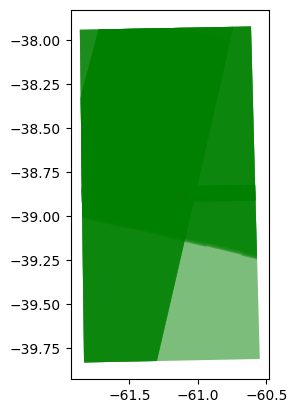

In [24]:
# 2. Defino ROI en geodataframe de geopandas a partir del wkt que obtuve cuando analicé la ROI
ROI_wkt = set_wkt_V1(conf_dict['FOLDERS']['roi'], False)
ROI_shape = wkt.loads(ROI_wkt)
# display(ROI_shape)
d = {'col1': ['ROI busqueda'], 'geometry': [ROI_shape]}
roi_gdf = gpd.GeoDataFrame(d, crs=crs)
alpha_view = 0.3
ax = gdfWatts_Sidx_Fd.plot(color='green', alpha=alpha_view)

roi_gdf.plot(ax=ax, color='red', alpha=alpha_view)

display(gdfWatts_Sidx_Fd)

# De paso muestro la superposición en un muy bonito plot

In [25]:
# 3. Obtengo intersección entre ambos dataframes, a ver si da...

inter_shapes = gdfWatts_Sidx_Fd.overlay(roi_gdf, how='intersection')
# inter_shapes['inter_area'] = inter_shapes.area
# print('Cálculo de intersección de área')
# display(inter_shapes.area/ROI_shape.area)
# display(inter_shapes)

# Dio bien...

list2add = list(inter_shapes.area/ROI_shape.area)
display(list2add)
# Lo agrego en ppio a geodataframe de interesección 'inter_shapes_2'
gdfWatts_Sidx_Fd['ROI_intersec'] = list2add
display(gdfWatts_Sidx_Fd)


/tmp/ipykernel_1189/1555089851.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  list2add = list(inter_shapes.area/ROI_shape.area)


[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002]

cloudCover  \
Sensing_time        Prod_level Tile   Baseline               
2019-01-04 13:51:11 MSIL2A     T20HPC N0211       0.009632   
                                      N0500       0.001401   
                               T20HPB N0500       0.001386   
                                      N0211       0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211      43.748757   
                               T20HPB N0211       0.122309   
                                      N0500       0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999      41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211       0.289772   
                                      N0500       0.383725   
                               T20HPC N0211       2.168586   
                                      N0500       2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500      32.750869   
                               T20HPC N0500      12.116794   
                                      N0211       7.868629   
                               T20HPB N0211      27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999       0.000000   
                                      N0500       0.001266   
                               T20HPB N9999       0.000000   
                                      N0500       0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999       1.447500   
                                      N0500      10.794668   
                               T20HPC N0500       7.561700   
                                      N9999       2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211       0.310021   
                               T20HPC N0211      10.737711   
                                      N0500      20.412582   
                               T20HPB N0500       0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
                               T20HPB N9999     c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                                      N0500     fbb52bcc-497c-422f-b330-6d838f53cdb4   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999     6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                                      N0500     722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   
                               T20HPC N0500     949f1b54-f109-4ecd-ad27-3bd

In [26]:
# Vuelvo a cambiar orden de columnas para que aparezca ROI_intersec como la primera columna
col_list = (list(gdfWatts_Sidx_Fd.columns))
col_list_aux = []
col_list_aux .append(col_list[-1])
col_list_aux[1:] = col_list[0:-1]
# col_list[0] = aux_value
# display(col_list, col_list_aux)

display(gdfWatts_Sidx_Fd[col_list_aux])

gdfWatts_Sidx_Fd = gdfWatts_Sidx_Fd[col_list]

ROI_intersec  cloudCover  \
Sensing_time        Prod_level Tile   Baseline                             
2019-01-04 13:51:11 MSIL2A     T20HPC N0211              1.0    0.009632   
                                      N0500              1.0    0.001401   
                               T20HPB N0500              1.0    0.001386   
                                      N0211              1.0    0.038087   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211              1.0   43.748757   
                               T20HPB N0211              1.0    0.122309   
                                      N0500              1.0    0.121756   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999              1.0   41.351700   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211              1.0    0.289772   
                                      N0500              1.0    0.383725   
                               T20HPC N0211              1.0    2.168586   
                                      N0500              1.0    2.082822   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500              1.0   32.750869   
                               T20HPC N0500              1.0   12.116794   
                                      N0211              1.0    7.868629   
                               T20HPB N0211              1.0   27.538483   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999              1.0    0.000000   
                                      N0500              1.0    0.001266   
                               T20HPB N9999              1.0    0.000000   
                                      N0500              1.0    0.002445   
2019-01-22 14:00:49 MSIL2A     T20HPB N9999              1.0    1.447500   
                                      N0500              1.0   10.794668   
                               T20HPC N0500              1.0    7.561700   
                                      N9999              1.0    2.188200   
2019-01-24 13:51:11 MSIL2A     T20HPB N0211              1.0    0.310021   
                               T20HPC N0211              1.0   10.737711   
                                      N0500              1.0   20.412582   
                               T20HPB N0500              1.0    0.223910   

                                                                                  Id  \
Sensing_time        Prod_level Tile   Baseline                                         
2019-01-04 13:51:11 MSIL2A     T20HPC N0211     008e4f37-617f-5aa5-91ef-4f49ac570ffc   
                                      N0500     00f121c1-2159-41ce-b9d3-090b27c3967b   
                               T20HPB N0500     82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                                      N0211     b819e8e6-3c1c-5aee-b85e-e7e236b86179   
2019-01-07 14:00:51 MSIL2A     T20HPC N0211     1f42400b-7bea-5b19-bada-60261f2de719   
                               T20HPB N0211     4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                                      N0500     90e85ffb-f62b-4158-bb16-0238d7b8a3f3   
2019-01-12 14:00:49 MSIL2A     T20HPC N9999     194e5114-561b-423c-a757-e6e4e06535af   
2019-01-14 13:51:11 MSIL2A     T20HPB N0211     08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                                      N0500     1518c1f1-3e1b-40cf-88e7-a47eda9d1495   
                               T20HPC N0211     57f82513-7761-5ee9-b1fc-a503355f2316   
                                      N0500     7b30b31c-e5a4-418f-b3b6-bd37a6559694   
2019-01-17 14:00:51 MSIL2A     T20HPB N0500     349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                               T20HPC N0500     6dfdcd2c-d467-46e1-8568-743c22a33dbe   
                                      N0211     87a368aa-81b8-57ac-bf8a-344696033ac6   
                               T20HPB N0211     ea26ec22-dda7-5ec4-af20-98844a9a72dd   
2019-01-19 13:51:09 MSIL2A     T20HPC N9999     4a528a71-8e31-4d82-94d8-28b9b08c9716   
                                      N0500     6edfa1a6-a73b-4480-af34-2243b1e1a465   
       

## Filtrados de geodataframe

A continuación se planterá la resuolución de filtrar los geodataframes de modo que quede un solo producto por día. Se observa en el dataframe completo hay casos en el que se encuentran muchos casos por día. Por lo que se hace necesario de manera de realizar el análisis temporal de NDVI ( o de cualquier otro coeficiente) el filtrado de modo que quede solo un producto por día. A continuación se presentan los primeros tres filtrados pensados para cumplir con el requerimiento de tener un producto por día.

### Filtrado 1:
Consiste en quedarme con la primer entrada en caso de que muchos productos disponibles

### Filtrado 2:
De la misma manera que el filtrado 1 si tiene un solo producto devuelve ese producto para bajar. En caso de que tenga más de uno pondera el resultado devuelto por los siguientes criterios,
1. Dejar solo los que tengan el área completa de la ROI
2. De los que queden ponderar por cobertura nubosa
3. Si aún así no se puede elegir uno elegir el que tenga el mayor procesamiento excluyendo el caso N9999

### Filtrado 3:
Nuevamente si se tiene un solo producto quedarnos con ese. En caso de que presente más de un Tile, como es el este caso de ROI "Campo_Atahona.kml", separar el df seleccionado en los que sea necesario separar en dos df (no puede haber más de dos tiles por día). Comparo los Tiles por:
1. el área de cobertura y elijo el caso que abarque mayor área

Una vez que se eligió la mayor cobertura seleccionar por:
1. Si aún así no se puede elegir uno elegir el que tenga el mayor procesamiento excluyendo el caso N9999

In [29]:
# Link de recursos para hallar valores únicos de fechas en MultiIndex
# https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
def filter_df(df2filter, filter_type =1):
    """ Filtro el df generado para quedarme con un solo producto por día """
    if filter_type == 3:
        list2concat = filter_3(df2filter)
    else:
        
        # Select from all the entries filtered by "sensing day" just one appling differents algorithms
        idx = df2filter.index
        # I try to get entries by day, someway...
        day_list = list(idx.remove_unused_levels().get_level_values(0).unique())
        
        ## Código para filtrar productos encontrados un solo día ##
        list2concat = []
        for date in day_list:
            # print(f'Listado de productos de fecha: {str(date)}')
            # display(df2filter.loc[date])
            if filter_type == 1:
                list2concat.append(filter_1(df2filter.loc[date]))
            elif filter_type == 2:
                list2concat.append(filter_2(df2filter.loc[date]))
        ####################################################################
    
        print('Cantidad de productos a ingresar:', len(list2concat))

    prod_filtered = pd.DataFrame(list2concat)

    display(prod_filtered)
    
    return None

def filter_1(dfbydate):
    # print('Cantidad de productos por fecha: ', dfbydate['Id'].count())
    # display(dfbydate.iloc[0])
    return dfbydate.iloc[0]

def filter_2(dfbydate):
    # display(dfbydate)
    qty_entries = dfbydate.Id.count()
    # print(f'Cantidad de entradas por día {qty_entries}')
    if  qty_entries == 1:
        return dfbydate.iloc[0]
    else:
        # Filtro en primera instancia por área de intersección con ROI
        df_filt_1 = dfbydate.nlargest(qty_entries, 'ROI_intersec')
        qty_entries_2 = df_filt_1.Id.count()
        # Filtro en segunda instancia por cobertura nubosa
        df_filt_2 = df_filt_1.nsmallest(qty_entries_2, 'cloudCover')
        return df_filt_2.iloc[0]

def filter_3(df):
    """ Filtrado general, analizo primero todo el df y luego filtro, los otros filtran ciertos atributos pero de a un día a la vez """
    # Línea para filtrar columna por valor determinado (en este caso discriminación de tile)    
    
    idx = df.index
    tile_list = list(idx.remove_unused_levels().get_level_values(2).unique())
    
    # Obtengo los tipo de tile en qué se divide el producto disponible y obtengo la cantidad de nubosidad por tile
    list_cc = []
    for i,tile in enumerate(tile_list):
        df2analize = df.loc[:,:,[tile]]
        cloud_cover_sum = df2analize['cloudCover'].sum()
        list_cc.append((i, tile, cloud_cover_sum))

    # Elección de tile según comparación de cobertura nubosa (ellijo la que tiene el menor número)
    if list_cc[0][2] < list_cc[1][2]:
        tile_def = list_cc[0][1]
        tile_wrong = list_cc[1][1]
    else:
        tile_def = list_cc[1][1]
        tile_wrong = list_cc[0][1]

    # Quedaría seleccionar las entradas por tile y quedarme con una por día (a implementar)
    
    # Procesamiento de df elegido para quedarme con la de mayor número de procesamiento
    df_chos = df.loc[:,:,[tile_def]]
    idx_chos = df_chos.index
    basel_series = (idx_chos.get_level_values(3)).to_series() # PENDIENTE DE CONTINUAR: Este procesamiento lo tengo que hacer por día

    # Procesamiento de serie para transformar los caracteres en número
    # Primero quito la 'N' del código de baseline
    basel_proc = basel_series.str.replace('N','')

    # Segundo paso la cadena de caracteres a número
    basel_proc = pd.to_numeric(basel_proc)

    # Guardo la serie procesada como una columna en el dataframe elegido
    # Vuelo a setear índice original para no tener problema con el seteo de la nueva columna en dataframe elegido
    # basel_proc.reset_index(inplace = True) -> no funcionó esta solución, debí pasarla a lista y después guardarla como columna
    basel_nbr_list = list(basel_proc)
    df_chos['base_nber'] = basel_nbr_list

    # Aplico algoritmo para seleccionar producto por día
    # Filtro en primera instancia por área de intersección con ROI
    
    idx_chos = df_chos.index
    # I try to get entries by day, someway...
    day_list_chos = list(idx_chos.remove_unused_levels().get_level_values(0).unique())
    
    ## Código para filtrar productos encontrados un solo día ##
    list2concat = []
    for date in day_list_chos:
        print(date)
        list2concat.append(filter_base_nber(df_chos.loc[date]))
    return None
        
def filter_base_nber(dfbyday, verbose = False):
    qty_entries = dfbyday.Id.count()
    # print(f'Cantidad de entradas por día {qty_entries}')
    if  qty_entries == 1:
        return dfbyday.iloc[0]
    else:
        # Filtro la opción 9999, será la última opción
        display(dfbyday)
        # PENDIENTE: Elegir productos dejando como última opción 9999 y luego elegir dataset por mayor valor de procesamiento
    return None
def disp_and_type(obj, type_of_show='display'):
    print('Tipo del objeto presentado', type(obj), sep='\n')
    print('Objeto a verificar')
    if (type_of_show == 'print'):
        print(obj)
    else:
        display(obj)
    return None

In [30]:
# Intento obtener las fechas de búsqueda de manera única (unique)
filter_df(gdfWatts_Sidx_Fd, filter_type = 3)

2019-01-04 13:51:11


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N0500       0.001386  82026d9b-6732-4c14-9fcf-ad3e10a39b9a   
                  N0211       0.038087  b819e8e6-3c1c-5aee-b85e-e7e236b86179   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     S2A_MSIL2A_20190104T135111_N0500_R024_T20HPB_2...   
                  N0211     S2A_MSIL2A_20190104T135111_N0211_R024_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N0500     application/octet-stream      313323302   
                  N0211     application/octet-stream              0   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     2024-01-28T02:42:30.137Z   
                  N0211     2019-01-04T22:37:55.038Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     2024-07-10T23:15:06.655Z   
                  N0211     2019-01-10T22:33:37.497Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N0500     2024-07-10T23:15:13.826Z    True                
                  N0211     2019-01-10T22:33:37.497Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N0500     ...   
                  N0211     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     geography'SRID=4326;POLYGON ((-60.568634 -39.2...   
                  N0211     geography'SRID=4326;POLYGON ((-60.568634 -39.2...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     {'type': 'Polygon', 'coordinates': [[[-60.5686...   
                  N0211     {'type': 'Polygon', 'coordinates': [[[-60.5686...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0211     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N0500           S2A        R024  20221209T015533.SAFE   
                  N0211           S2A        R024  20190104T162239.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     application/octet-stream   
                  N0211     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     POLYGON ((-60.56863 -39.24630, -60.58328 -38.8...   
                  N0211     POLYGON ((-60.56863 -39.24629, -60.68131 -39.2...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N0500             1.0       500  
                  N0211             1.0       211  

[2 rows x 23 columns]

2019-01-07 14:00:51


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N0211       0.122309  4ffe8398-cbbd-5ed5-a0b7-46fc06ccf126   
                  N0500       0.121756  90e85ffb-f62b-4158-bb16-0238d7b8a3f3   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     S2A_MSIL2A_20190107T140051_N0211_R067_T20HPB_2...   
                  N0500     S2A_MSIL2A_20190107T140051_N0500_R067_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N0211     application/octet-stream              0   
                  N0500     application/octet-stream      561583011   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-07T21:45:20.923Z   
                  N0500     2024-01-22T21:31:32.732Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-10T21:47:24.091Z   
                  N0500     2024-07-11T06:08:28.702Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N0211     2019-01-10T21:47:24.091Z    True                
                  N0500     2024-07-11T06:08:37.922Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N0211     ...   
                  N0500     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     geography'SRID=4326;POLYGON ((-61.006348 -38.8...   
                  N0500     geography'SRID=4326;POLYGON ((-61.00644 -38.82...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     {'type': 'Polygon', 'coordinates': [[[-61.0063...   
                  N0500     {'type': 'Polygon', 'coordinates': [[[-61.0064...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N0211           S2A        R067  20190107T175322.SAFE   
                  N0500           S2A        R067  20221129T125253.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     application/octet-stream   
                  N0500     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     POLYGON ((-61.00635 -38.82992, -61.02518 -38.8...   
                  N0500     POLYGON ((-61.00644 -38.82992, -61.84772 -38.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N0211             1.0       211  
                  N0500             1.0       500  

[2 rows x 23 columns]

2019-01-14 13:51:11


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N0211       0.289772  08fb82fb-b92b-5e44-9c02-f1d18f83dfe3   
                  N0500       0.383725  1518c1f1-3e1b-40cf-88e7-a47eda9d1495   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     S2A_MSIL2A_20190114T135111_N0211_R024_T20HPB_2...   
                  N0500     S2A_MSIL2A_20190114T135111_N0500_R024_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N0211     application/octet-stream              0   
                  N0500     application/octet-stream      311801103   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-15T10:03:48.167Z   
                  N0500     2024-01-03T16:14:56.224Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-14T21:52:35.133Z   
                  N0500     2024-05-19T10:39:03.555Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N0211     2022-10-12T22:56:05.571Z    True                
                  N0500     2024-05-19T10:39:09.819Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N0211     ...   
                  N0500     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     geography'SRID=4326;POLYGON ((-60.569305 -39.2...   
                  N0500     geography'SRID=4326;POLYGON ((-60.569305 -39.2...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     {'type': 'Polygon', 'coordinates': [[[-60.5693...   
                  N0500     {'type': 'Polygon', 'coordinates': [[[-60.5693...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N0211           S2A        R024  20190114T161918.SAFE   
                  N0500           S2A        R024  20221202T103605.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     application/octet-stream   
                  N0500     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     POLYGON ((-60.56930 -39.22683, -60.67404 -39.2...   
                  N0500     POLYGON ((-60.56930 -39.22684, -60.58328 -38.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N0211             1.0       211  
                  N0500             1.0       500  

[2 rows x 23 columns]

2019-01-17 14:00:51


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N0500      32.750869  349e5e12-2951-4cd3-b559-f8b4db7fd7de   
                  N0211      27.538483  ea26ec22-dda7-5ec4-af20-98844a9a72dd   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     S2A_MSIL2A_20190117T140051_N0500_R067_T20HPB_2...   
                  N0211     S2A_MSIL2A_20190117T140051_N0211_R067_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N0500     application/octet-stream      601673515   
                  N0211     application/octet-stream              0   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     2024-01-16T12:44:38.942Z   
                  N0211     2019-01-18T00:49:25.041Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     2024-05-19T21:43:14.872Z   
                  N0211     2019-01-25T10:37:21.139Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N0500     2024-05-19T21:43:29.788Z    True                
                  N0211     2019-01-25T10:37:21.139Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N0500     ...   
                  N0211     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     geography'SRID=4326;POLYGON ((-61.005585 -38.8...   
                  N0211     geography'SRID=4326;POLYGON ((-61.005554 -38.8...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     {'type': 'Polygon', 'coordinates': [[[-61.0055...   
                  N0211     {'type': 'Polygon', 'coordinates': [[[-61.0055...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0211     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N0500           S2A        R067  20221221T020936.SAFE   
                  N0211           S2A        R067  20190117T175217.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0500     application/octet-stream   
                  N0211     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0500     POLYGON ((-61.00559 -38.82991, -61.84772 -38.8...   
                  N0211     POLYGON ((-61.00555 -38.82990, -61.02200 -38.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N0500             1.0       500  
                  N0211             1.0       211  

[2 rows x 23 columns]

2019-01-19 13:51:09


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N9999       0.000000  c20d26ec-24e5-4988-bb18-3b2d0cc7a603   
                  N0500       0.002445  fbb52bcc-497c-422f-b330-6d838f53cdb4   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     S2B_MSIL2A_20190119T135109_N9999_R024_T20HPB_2...   
                  N0500     S2B_MSIL2A_20190119T135109_N0500_R024_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N9999     application/octet-stream      901876972   
                  N0500     application/octet-stream      864192534   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     2023-04-23T14:19:18.339Z   
                  N0500     2024-01-14T01:38:39.435Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     2023-04-23T17:07:40.010Z   
                  N0500     2024-05-20T03:41:54.969Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N9999     2023-04-23T17:07:40.010Z    True                
                  N0500     2024-05-20T03:42:06.994Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N9999     ...   
                  N0500     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     geography'SRID=4326;POLYGON ((-61.847717 -38.8...   
                  N0500     geography'SRID=4326;POLYGON ((-61.847717 -38.8...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     {'type': 'Polygon', 'coordinates': [[[-61.8477...   
                  N0500     {'type': 'Polygon', 'coordinates': [[[-61.8477...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N9999           S2B        R024  20230423T162223.SAFE   
                  N0500           S2B        R024  20221129T063255.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     application/octet-stream   
                  N0500     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     POLYGON ((-61.84772 -38.84277, -61.83136 -39.8...   
                  N0500     POLYGON ((-61.84772 -38.84277, -61.83136 -39.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N9999             1.0      9999  
                  N0500             1.0       500  

[2 rows x 23 columns]

2019-01-22 14:00:49


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N9999       1.447500  6bc22198-6e9a-4ff1-a057-9460d2a5cfea   
                  N0500      10.794668  722d2df8-4c6a-4f5f-8fa1-ca2ac1d72ee8   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     S2B_MSIL2A_20190122T140049_N9999_R067_T20HPB_2...   
                  N0500     S2B_MSIL2A_20190122T140049_N0500_R067_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N9999     application/octet-stream      561818312   
                  N0500     application/octet-stream      554564308   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     2023-04-23T22:01:00.996Z   
                  N0500     2024-01-15T03:37:00.932Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     2023-04-24T00:34:28.918Z   
                  N0500     2024-05-20T13:57:54.782Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N9999     2023-04-24T00:34:28.918Z    True                
                  N0500     2024-05-20T13:58:08.063Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N9999     ...   
                  N0500     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     geography'SRID=4326;POLYGON ((-61.00528 -38.82...   
                  N0500     geography'SRID=4326;POLYGON ((-61.00534 -38.82...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     {'type': 'Polygon', 'coordinates': [[[-61.0052...   
                  N0500     {'type': 'Polygon', 'coordinates': [[[-61.0053...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N9999           S2B        R067  20230424T000227.SAFE   
                  N0500           S2B        R067  20221220T083912.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N9999     application/octet-stream   
                  N0500     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N9999     POLYGON ((-61.00528 -38.82990, -61.84772 -38.8...   
                  N0500     POLYGON ((-61.00534 -38.82990, -61.84772 -38.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N9999             1.0      9999  
                  N0500             1.0       500  

[2 rows x 23 columns]

2019-01-24 13:51:11


cloudCover                                    Id  \
Prod_level Tile   Baseline                                                     
MSIL2A     T20HPB N0211       0.310021  792d901b-05a4-5c63-ae9e-29248167bf58   
                  N0500       0.223910  f7f20bd8-07ff-402b-9f64-21f45a056fe3   

                                                                         Name  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     S2A_MSIL2A_20190124T135111_N0211_R024_T20HPB_2...   
                  N0500     S2A_MSIL2A_20190124T135111_N0500_R024_T20HPB_2...   

                                         ContentType  ContentLength  \
Prod_level Tile   Baseline                                            
MSIL2A     T20HPB N0211     application/octet-stream              0   
                  N0500     application/octet-stream      317716765   

                                          OriginDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-24T21:49:50.894Z   
                  N0500     2024-01-08T19:52:37.701Z   

                                     PublicationDate  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     2019-01-24T21:59:37.199Z   
                  N0500     2024-05-21T13:34:37.754Z   

                                    ModificationDate  Online EvictionDate  \
Prod_level Tile   Baseline                                                  
MSIL2A     T20HPB N0211     2022-10-12T14:51:46.933Z    True                
                  N0500     2024-05-21T13:34:51.775Z    True                

                            ...  \
Prod_level Tile   Baseline  ...   
MSIL2A     T20HPB N0211     ...   
                  N0500     ...   

                                                                    Footprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     geography'SRID=4326;POLYGON ((-60.56891 -39.23...   
                  N0500     geography'SRID=4326;POLYGON ((-60.56891 -39.23...   

                                                                 GeoFootprint  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     {'type': 'Polygon', 'coordinates': [[[-60.5689...   
                  N0500     {'type': 'Polygon', 'coordinates': [[[-60.5689...   

                                                                   Attributes  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     [{'@odata.type': '#OData.CSC.StringAttribute',...   
                  N0500     [{'@odata.type': '#OData.CSC.StringAttribute',...   

                           Mission_id Rel_orb_num             Prod_time  \
Prod_level Tile   Baseline                                                
MSIL2A     T20HPB N0211           S2A        R024  20190124T161854.SAFE   
                  N0500           S2A        R024  20221204T061214.SAFE   

                             @odata.mediaContentType  \
Prod_level Tile   Baseline                             
MSIL2A     T20HPB N0211     application/octet-stream   
                  N0500     application/octet-stream   

                                                                        shape  \
Prod_level Tile   Baseline                                                      
MSIL2A     T20HPB N0211     POLYGON ((-60.56891 -39.23789, -60.67548 -39.2...   
                  N0500     POLYGON ((-60.56891 -39.23790, -60.58328 -38.8...   

                           ROI_intersec base_nber  
Prod_level Tile   Baseline                         
MSIL2A     T20HPB N0211             1.0       211  
                  N0500             1.0       500  

[2 rows x 23 columns]

""
